In [1]:
# %matplotlib widget
# ==== 1) load packages ====
import numpy as np
import pandas as pd
import math
import glob
from sklearn.metrics import ndcg_score
from sklearn.preprocessing import StandardScaler
import torch
import os
os.chdir(
    # "/home/yliu420/Project/Belief-Elicitation-on-LLM-postrelease/analysis"
    "/Users/jingyi/Research/FYP/LLM/conjoint_openai/Belif-Elicitation-on-LLM-postrelease/analysis"
)
from analysis_pkg.preprocess import *
from analysis_pkg.models import *
from analysis_pkg.visualization_kernel_PCA import *
from llm_belief.analysis import visualize_probability_distribution
torch.manual_seed(2025)

In [2]:
scored_df = pd.read_csv('../data/scored_profiles_shuffled.csv')
real_df = pd.read_csv('../data/scored_real_profiles.csv')
score_models = [
    # 'MLP_score',
    'MLP_attention_score',
    'Logistic_regression_score',
    # 'adplasso_interaction_thres0.0001',
    'adplasso_interaction_square_thres0.0001',
    # 'adplasso_square_thres0.0001',
    # 'adplasso_interaction_square_thres0.001',
    # 'XGBoost',
    # 'LogitSquare'
]
feature_names = scored_df.columns[:10].tolist()

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

# Take 20,000 profiles to draw a smooth plot

In [4]:
df_train = scored_df.iloc[:20000,:].copy()
X_train = preprocess_test(df_train.iloc[:,:10])
X_test = preprocess_test(real_df.iloc[:,:10])
df_full = pd.concat([df_train, real_df], axis=0).reset_index(drop=True)

Saved: ../data/FA_loading/kpca_20k.csv

Top features for PC1 (by |corr|):
                                  feature       PC1       PC2
  rear camera longest focal length (in x) -0.580418 -0.300994
                  screen size (in inches) -0.575927  0.711062
          front camera resolution (in MP) -0.304756 -0.206154
                Geekbench multicore score  0.269097  0.336699
 rear camera main lens resolution (in MP) -0.228837 -0.155515
                        thickness (in mm)  0.222498 -0.090672
                                      RAM -0.171621 -0.413271
                                    price  0.028776  0.009733
battery life (in hours of video playback) -0.011805 -0.091856
                         ultrawide camera -0.000408 -0.004582

Top features for PC2 (by |corr|):
                                  feature       PC1       PC2
                  screen size (in inches) -0.575927  0.711062
                                      RAM -0.171621 -0.413271
                Geekben

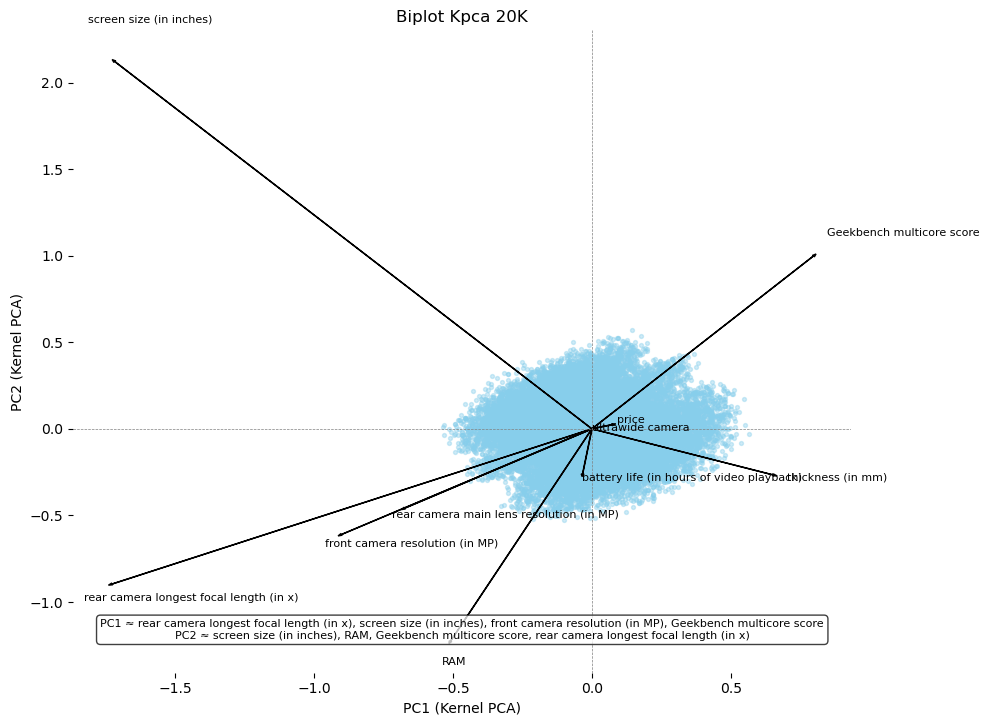

In [ ]:
kpca_result = kpca_reduce(
    X_train=X_train,
    X_test=X_test,
    n_components=2,
    feature_names=feature_names,
    save_loadings_csv_path="../data/loading/kpca_20k.csv",
    random_state=2025
)
visualize_feature_contributions_kpca(
    X_train=X_train,
    feature_names=feature_names,
    save_path="../plot/biplot_kpca_20k.png",
    kpca_result=kpca_result
)

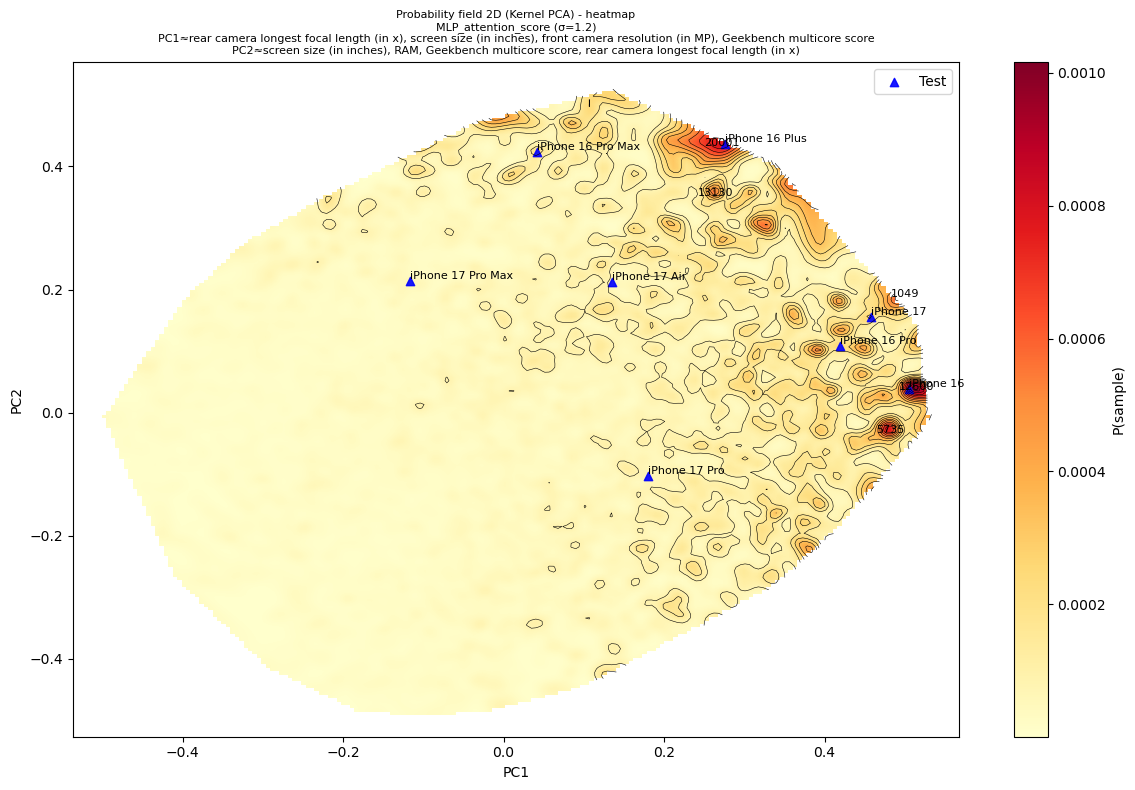

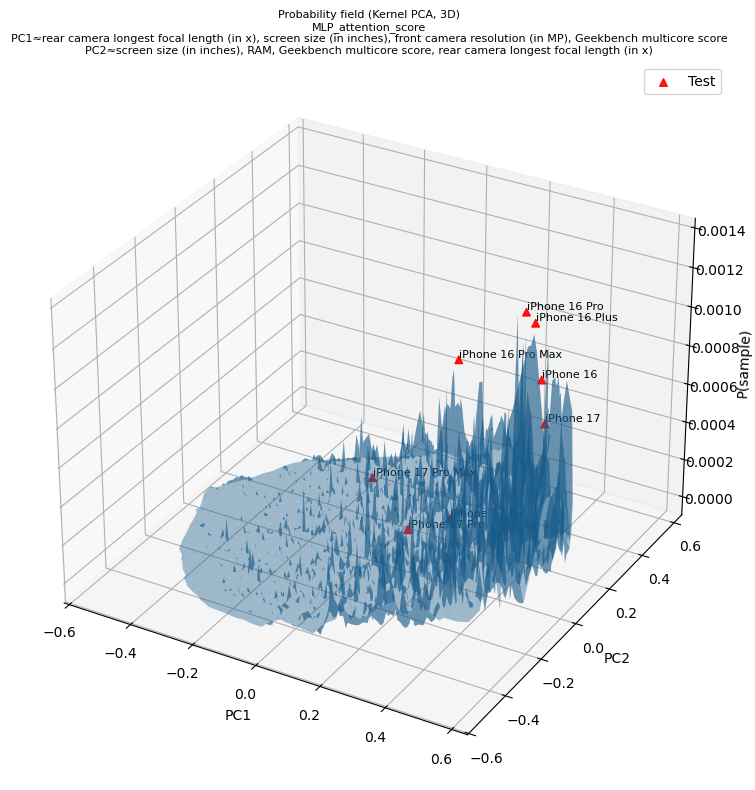

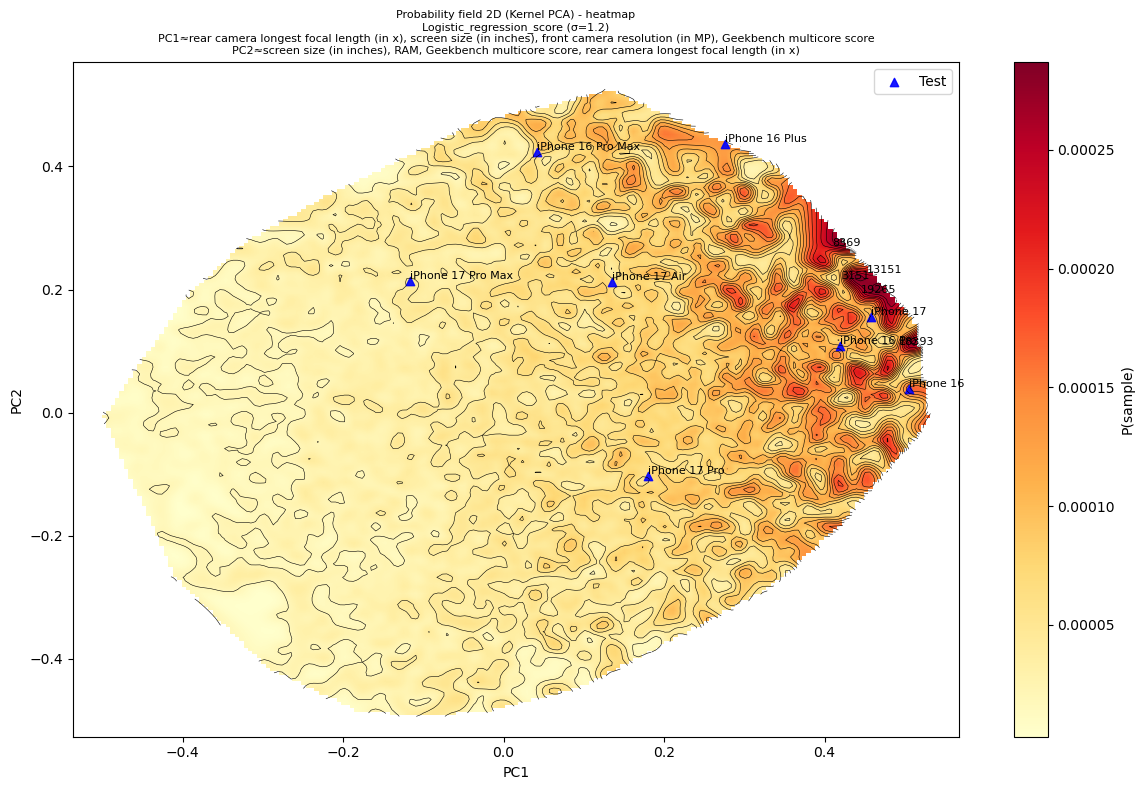

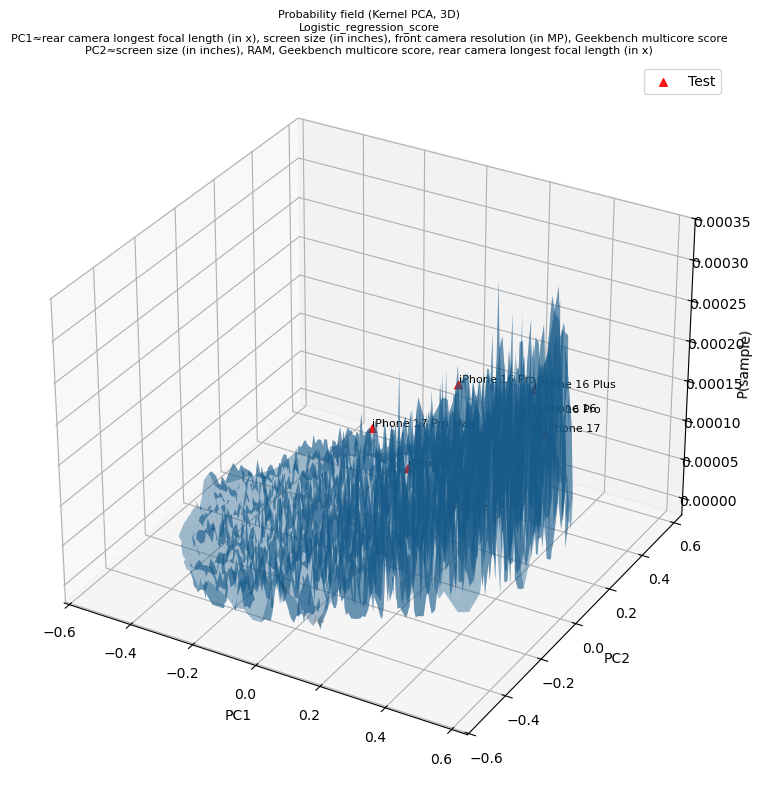

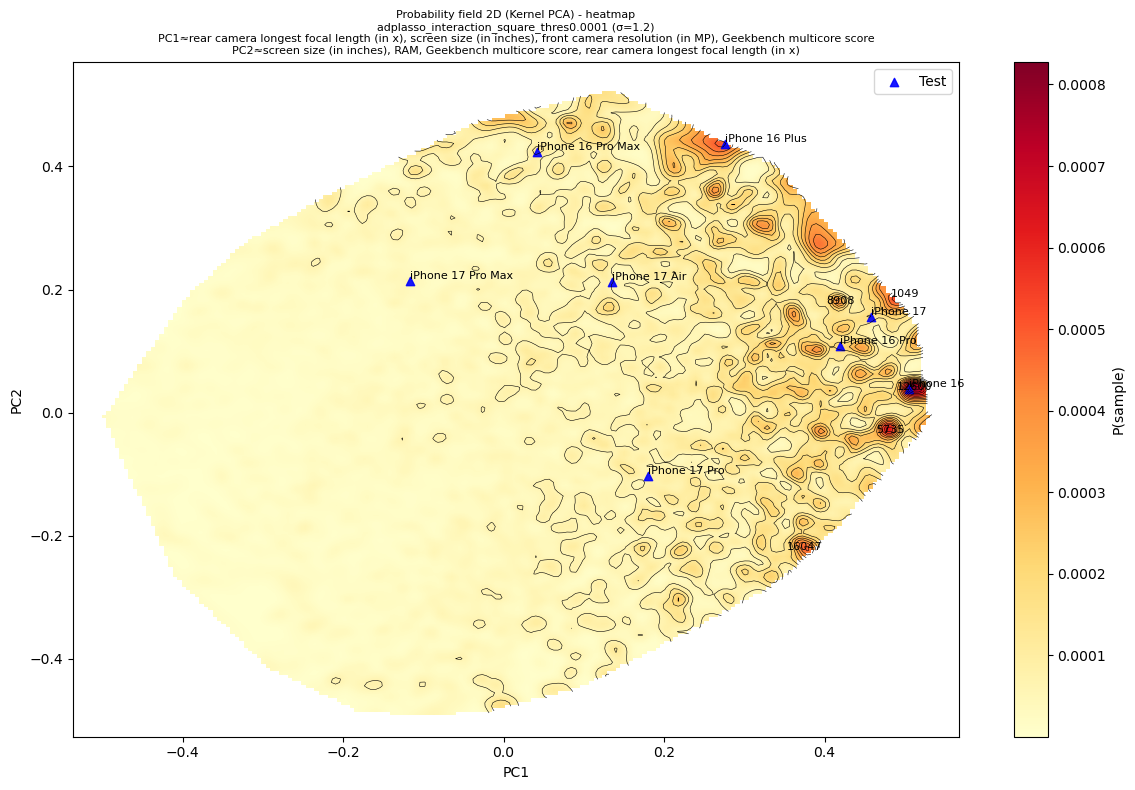

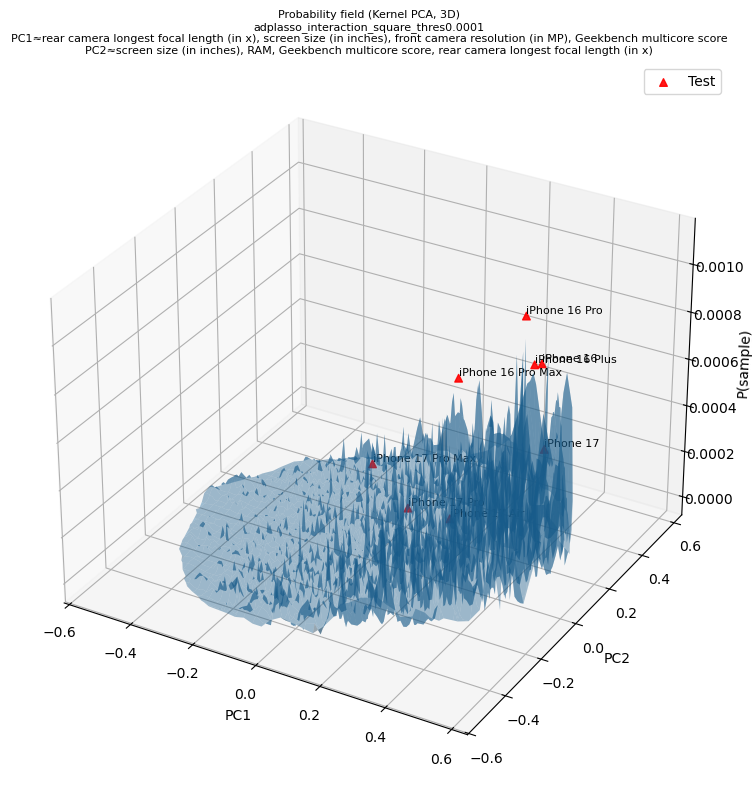

In [8]:
for model_name in score_models:
    scores_train = df_train[model_name].values
    scored_test = real_df[model_name].values
    scores = np.concatenate([scores_train, scored_test], axis=0)
    represent_idx = visualize_probability_distribution(
        X_full=torch.cat([X_train, X_test], dim=0),
        scores=scores,
        num_test=8,
        plot_kind="heatmap",
        smooth_sigma=1.2,
        fig_name=f"kpca_heatmap_{model_name}_20k.png",
        kpca_result=kpca_result,
        score_model=model_name,
        represent_method="peaks",
        test_idx=real_df['profile_id'].values.tolist(),
    )
    represent_idx = represent_idx.representative_indices
    df_full.iloc[represent_idx,:].to_csv(f"../data/analysis_representative_kpca/kpca_heatmap_{model_name}_20k.csv", index=True)
    _ = visualize_probability_distribution(
        X_full=torch.cat([X_train, X_test], dim=0),
        scores=scores,
        num_test=8,
        plot_kind="3d",
        fig_name=f"kpca_3d_{model_name}_20k.png",
        kpca_result=kpca_result,
        score_model=model_name,
        test_idx=real_df['profile_id'].values.tolist(),
    )

# Take top 1000 profiles within 20,000 to draw a concentrate plot

Saved: ../data/loading/kpca_varimax_MLP_attention_score_top1000.csv

Top features for PC1 (by |corr|):
                                  feature       PC1       PC2
battery life (in hours of video playback) -0.930804  0.268981
                                    price -0.257489 -0.652950
                  screen size (in inches)  0.181847  0.195868
          front camera resolution (in MP) -0.171300 -0.141253
                        thickness (in mm) -0.137960  0.050308
                Geekbench multicore score  0.112010  0.698887
 rear camera main lens resolution (in MP) -0.055596  0.023597
                                      RAM  0.022420  0.005371
                         ultrawide camera  0.021875  0.014138
  rear camera longest focal length (in x)  0.021441 -0.009591

Top features for PC2 (by |corr|):
                                  feature       PC1       PC2
                Geekbench multicore score  0.112010  0.698887
                                    price -0.257489 -0.6

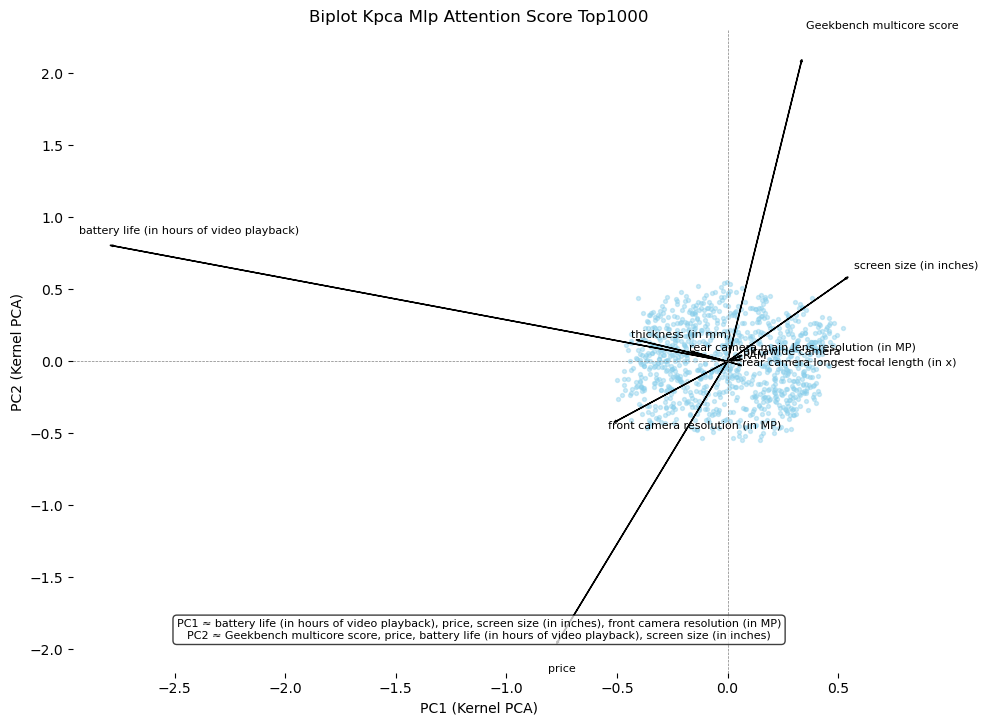

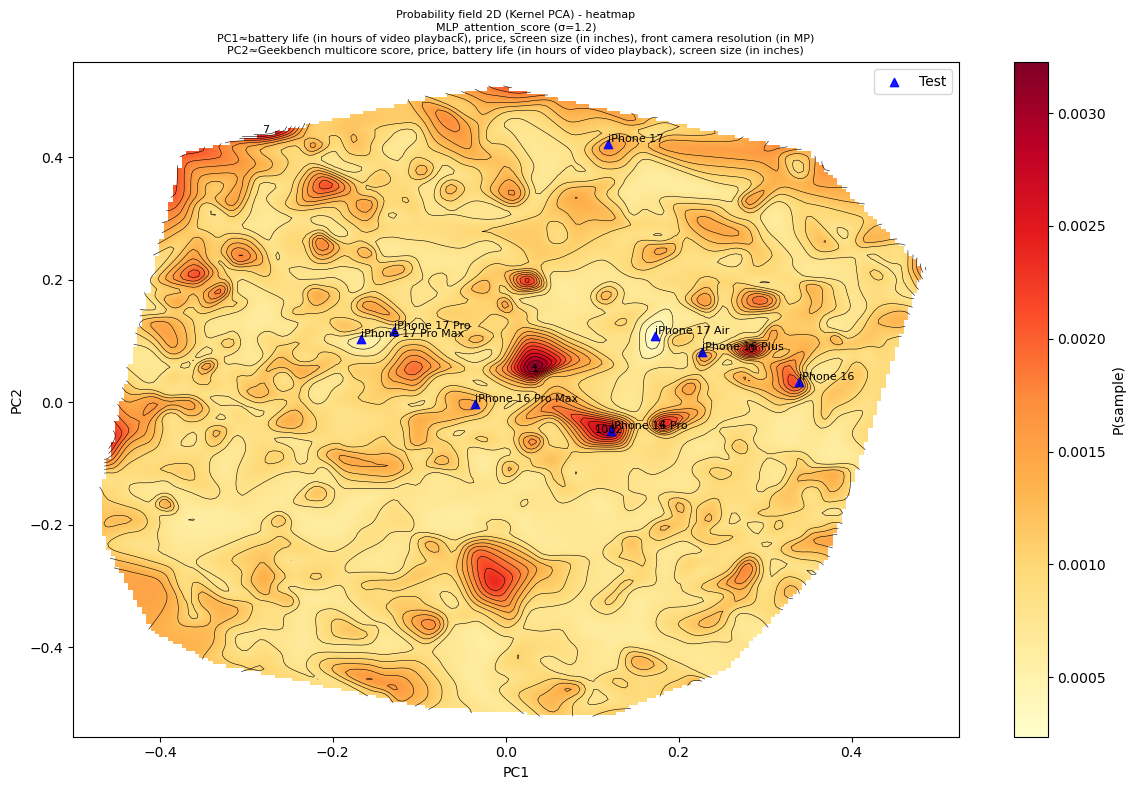

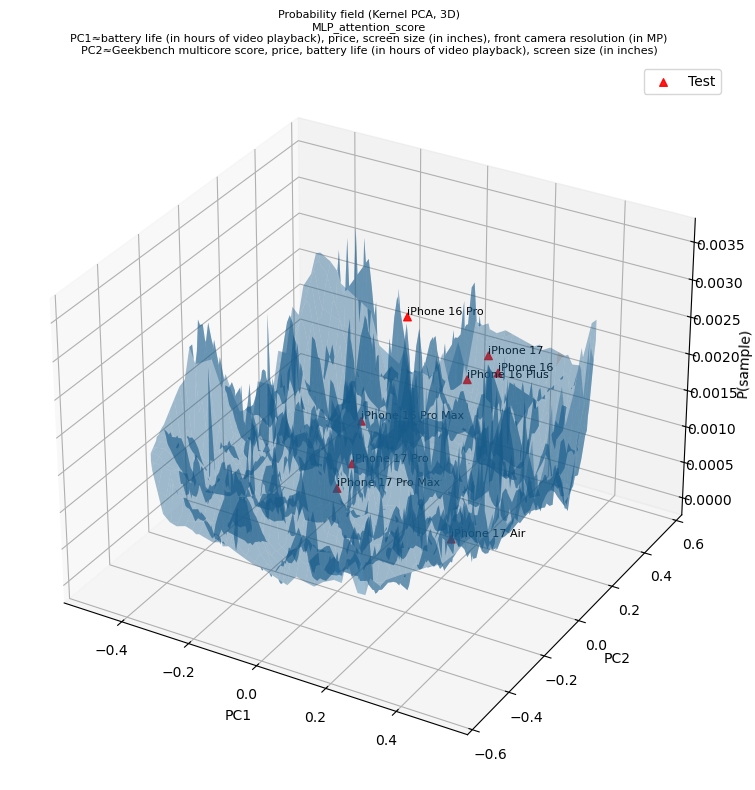

Saved: ../data/loading/kpca_varimax_Logistic_regression_score_top1000.csv

Top features for PC1 (by |corr|):
                                  feature       PC1       PC2
battery life (in hours of video playback)  0.746895 -0.507775
                                    price  0.556607  0.211306
                                      RAM  0.361673  0.783961
  rear camera longest focal length (in x) -0.157300  0.091092
                Geekbench multicore score -0.074177 -0.046301
                  screen size (in inches) -0.052965 -0.241504
          front camera resolution (in MP)  0.035904 -0.152718
                        thickness (in mm)  0.032086  0.030079
 rear camera main lens resolution (in MP) -0.017566 -0.122552
                         ultrawide camera -0.004627  0.013066

Top features for PC2 (by |corr|):
                                  feature       PC1       PC2
                                      RAM  0.361673  0.783961
battery life (in hours of video playback)  0.74689

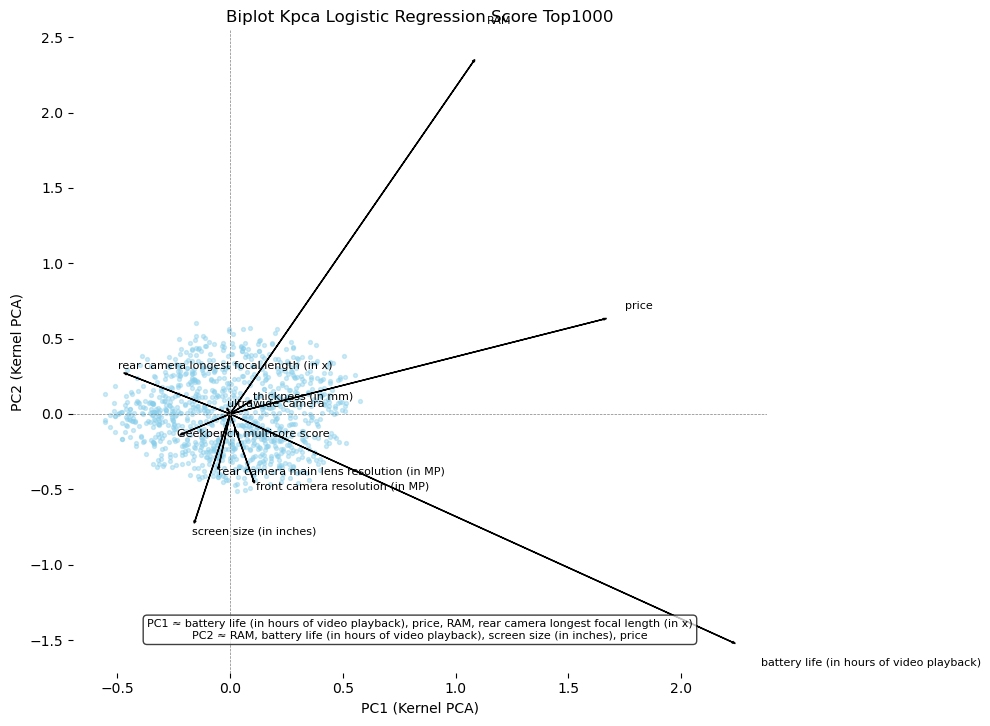

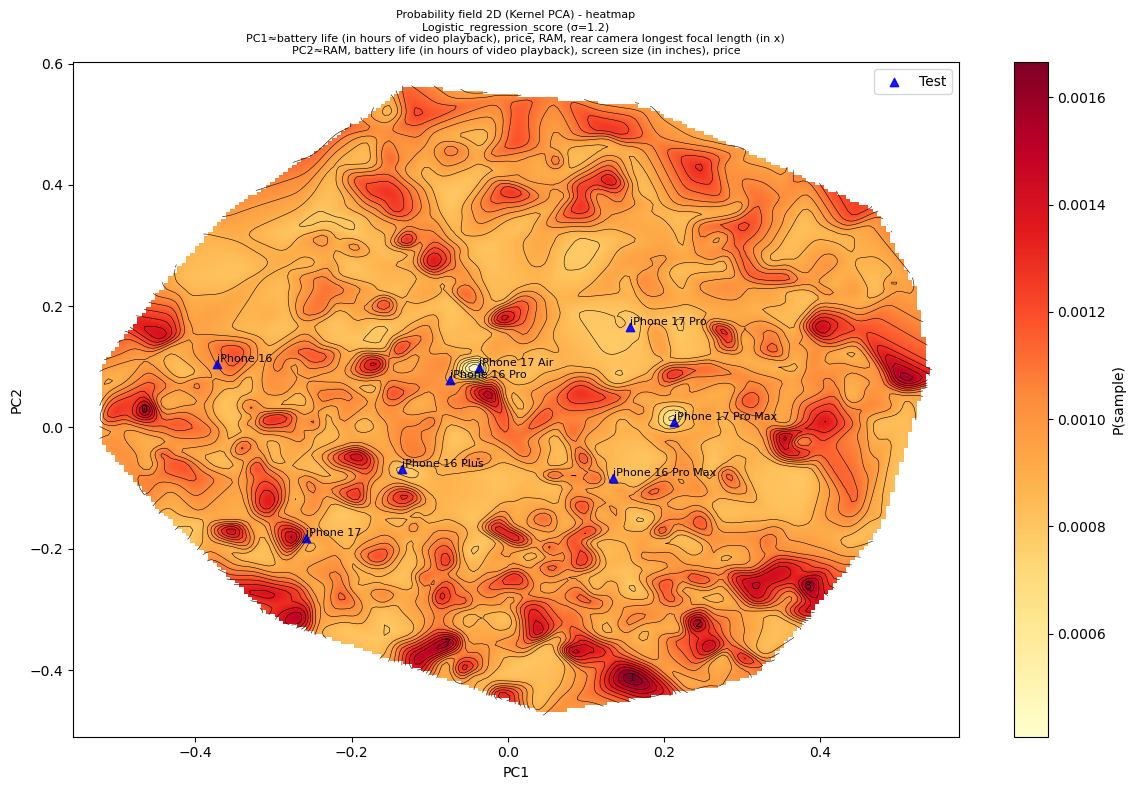

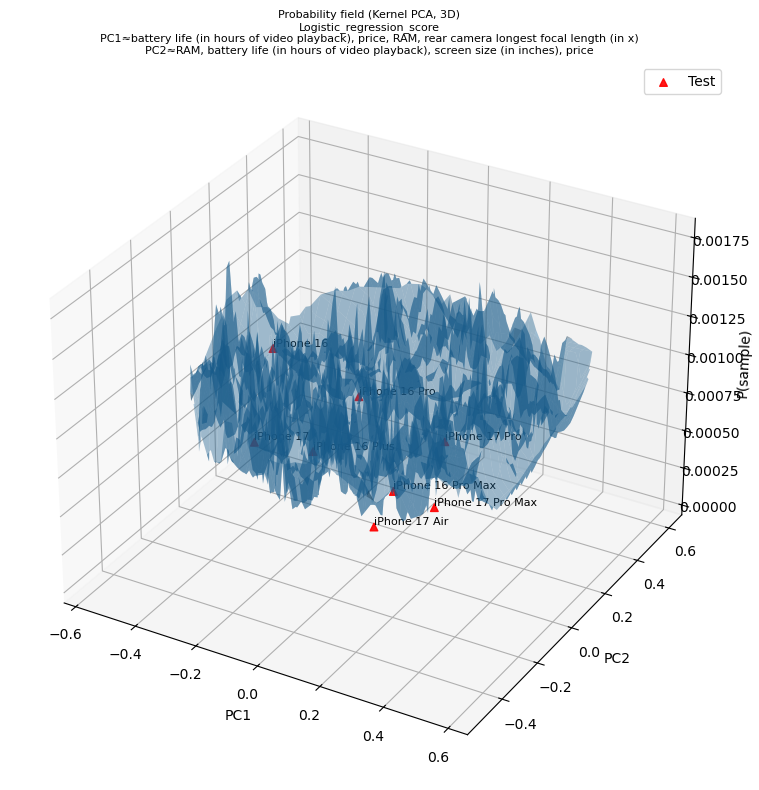

Saved: ../data/loading/kpca_varimax_adplasso_interaction_square_thres0.0001_top1000.csv

Top features for PC1 (by |corr|):
                                  feature       PC1       PC2
battery life (in hours of video playback)  0.694913 -0.677242
                Geekbench multicore score -0.674890 -0.670386
                                    price  0.329650  0.026252
                  screen size (in inches) -0.237673 -0.184732
                                      RAM  0.063227 -0.006268
 rear camera main lens resolution (in MP) -0.055645 -0.076442
                        thickness (in mm)  0.047683 -0.071323
          front camera resolution (in MP) -0.030549 -0.171397
                         ultrawide camera -0.025376 -0.011591
  rear camera longest focal length (in x)  0.000139  0.088759

Top features for PC2 (by |corr|):
                                  feature       PC1       PC2
battery life (in hours of video playback)  0.694913 -0.677242
                Geekbench multicore 

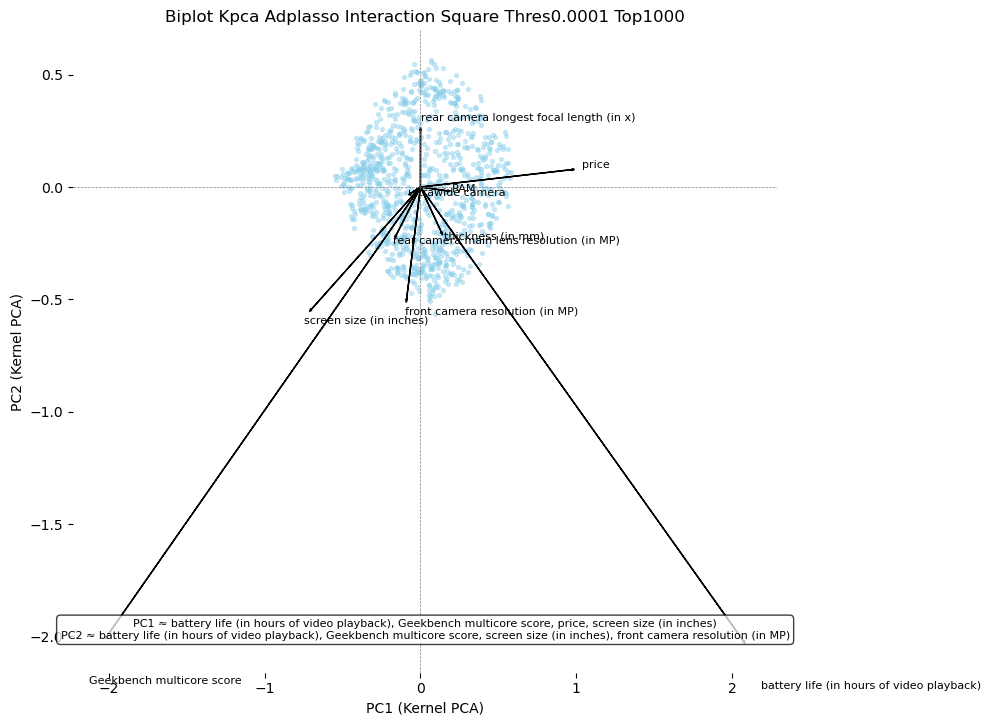

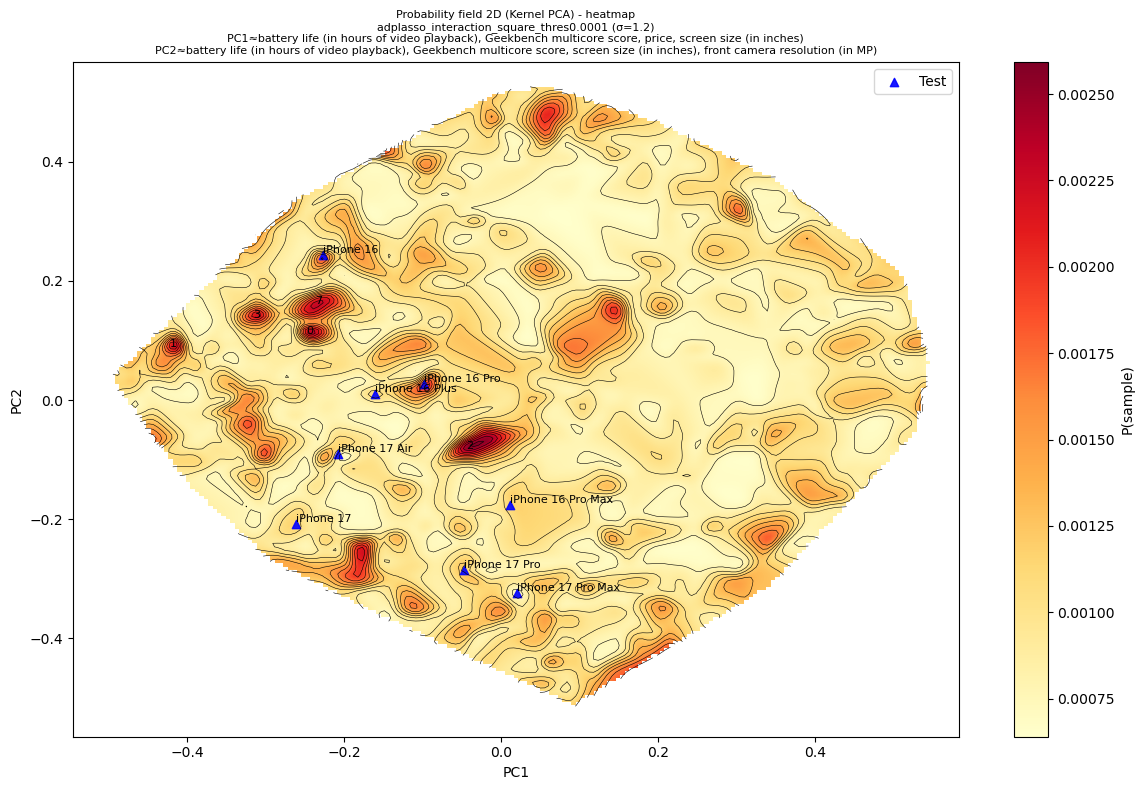

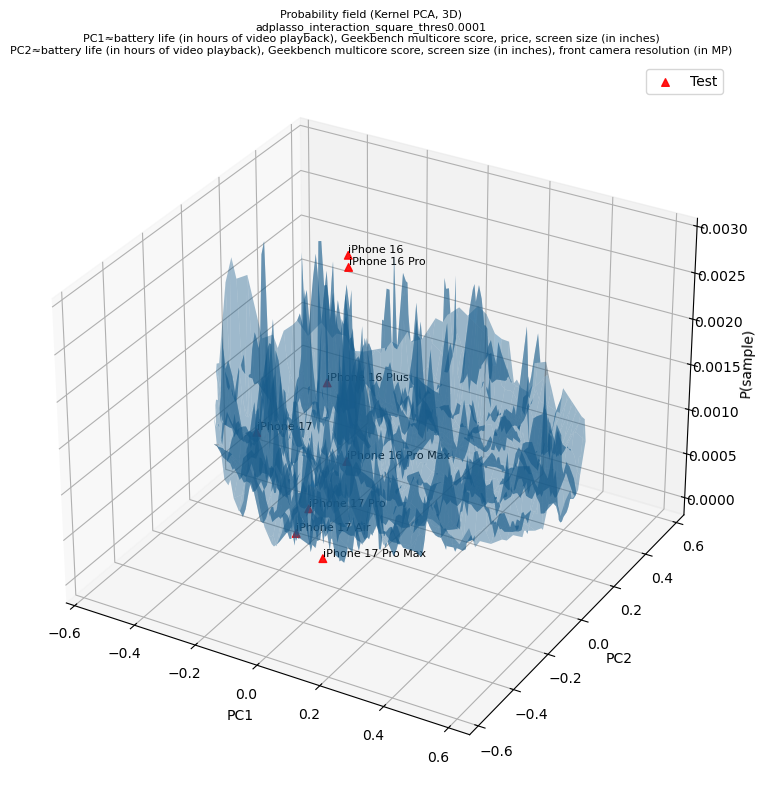

In [10]:
for model_name in score_models:
    df_train = scored_df.iloc[:20000,:].copy()
    df_train.sort_values(by=[model_name], ascending=False, inplace=True)
    df_train = df_train.iloc[:1000,:]
    df_full = pd.concat([df_train, real_df], axis=0).reset_index(drop=True)
    scores_train = df_train[model_name].values
    scored_test = real_df[model_name].values
    X_train = preprocess_test(df_train.iloc[:,:10])
    X_test = preprocess_test(real_df.iloc[:,:10])
    scores = np.concatenate([scores_train, scored_test], axis=0)
    kpca_result = kpca_reduce(
        X_train=X_train,
        X_test=X_test,
        n_components=2,
        feature_names=feature_names,
        save_loadings_csv_path=f"../data/loading/kpca_varimax_{model_name}_top1000.csv",
        random_state=2025
    )
    visualize_feature_contributions_kpca(
        X_train=X_train,
        feature_names=feature_names,
        save_path=f"../plot/biplot_kpca_{model_name}_top1000.png",
        kpca_result=kpca_result
    )
    represent_idx = visualize_probability_distribution(
        X_full=torch.cat([X_train, X_test], dim=0),
        scores=scores,
        num_test=8,
        plot_kind="heatmap",
        smooth_sigma=1.2,
        fig_name=f"kpca_heatmap_{model_name}_top1000.png",
        score_model=model_name,
        kpca_result=kpca_result,
        represent_method="peaks",
        test_idx=real_df['profile_id'].values.tolist(),
    )
    represent_idx = represent_idx.representative_indices
    df_full.iloc[represent_idx,:].to_csv(f"../data/analysis_representative_kpca/kpca_heatmap_{model_name}_top1000.csv", index=True)
    _ = visualize_probability_distribution(
        X_full=torch.cat([X_train, X_test], dim=0),
        scores=scores,
        num_test=8,
        plot_kind="3d",
        fig_name=f"kpca_3d_{model_name}_top1000.png",
        score_model=model_name,
        kpca_result=kpca_result,
        test_idx=real_df['profile_id'].values.tolist(),
    )